In [1]:
import numpy as np
import keras
from keras.layers import Dense, Conv2D, Activation
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adadelta, Adagrad, Adam, Nadam
from keras.utils import np_utils
from keras.datasets import cifar10
from sklearn.model_selection import GridSearchCV, train_test_split
from matplotlib import pyplot as plt
%matplotlib inline 
import tensorflow as tf
from scipy.misc import toimage

Using TensorFlow backend.


Import the CIFAR10 dataset from Keras and plot the first 10 images

`(tr_x, tr_y), (t_x, t_y) = keras.datasets.cifar10.load_data()`

In [2]:
# Load and properly reshape  data
(tr_x, tr_y), (t_x, t_y) = cifar10.load_data()

170409984/170498071 [============================>.] - ETA: 0s

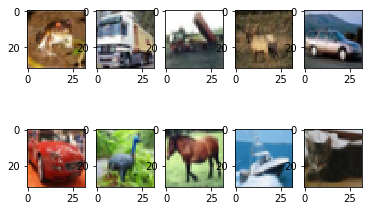

In [3]:
for i in range(10) :
    plt.subplot(2,5,i+1)
    plt.imshow(toimage(tr_x[i]))
plt.show()

Build a dense, feedforward neural network on the dataset

`def build_keras_model(optimizer):`

    `output_dim = 10 # number of classes`
    
    `model = Sequential()`
    
    `model.add(Dense(512, input_dim=input_dim, activation='relu'))`
    
    `model.add(Dense(256, activation='relu'))`
    
    `model.add(Dense(10, activation='softmax'))`
    
    `model.compile(optimizer=optimizer,
            loss='categorical_crossentropy', metrics ['accuracy'])`
            
    `return model`
    
and test the network using the following optimizers:
1. SGD with no momentum or decay
2. SGD with non-Nesterov momentum of .9
3. SGD with Nesterov momentum of .9
4. RMSprop with default params
5. Adagrad with default params
6. Adadelta with default params
7. Adam with default params
8. Nadam with default params

Train each model for 20 epochs, tracking accuracy on test data for each model. For each learn_rate in [.0001, .001, .01, .1, 1], plot the test error for each network-optimizer pair (one graph per learn_rate, showing all the optimizers at that rate). 

In [4]:
def build_keras_model(optimizer) :
    output_dim = 10
    model = Sequential()
    model.add(Dense(512, input_dim=input_dim, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    return model

# Generate optimizers for each run
def generate_optimizers(learning_rate=.01):
    """Generate a dictionary of optimizers for keras to use in gridsearch"""
    sgd = SGD()
    momentum = SGD(lr=learning_rate, momentum=.9)
    nesterov = SGD(lr=learning_rate, momentum=.9, nesterov=True)
    rmsprop = RMSprop(lr=learning_rate)
    adagrad = Adagrad(lr=learning_rate)
    adadelta = Adadelta(lr=learning_rate)
    adam = Adam(lr=learning_rate)
    nadam = Nadam(lr=learning_rate)
    optimizer_dict = {'SGD':sgd,
                      'Momentum':momentum,
                      'Nesterov':nesterov, 
                      'RMSprop':rmsprop, 
                      'AdaGrad':adagrad, 
                      'AdaDelta':adadelta, 
                      'Adam':adam,
                      'Nadam':nadam}
    return optimizer_dict

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
7s - loss: 14.5055 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/20
7s - loss: 14.5063 - acc: 0.1000 -

8s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/20
8s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/20
8s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/20
8s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
12s - loss: 13.9982 - acc: 0.1136 - val_loss: 13.9989 - val_acc: 0.1119
Epoch 2/20
12s - loss: 13.8569 - acc: 0.1221 - val_loss: 13.8876 - val_acc: 0.1224
Epoch 3/20
12s - loss: 13.7806 - acc: 0.1277 - val_loss: 13.8043 - val_acc: 0.1267
Epoch 4/20
12s - loss: 13.7176 - acc: 0.1323 - val_loss: 13.7404 - val_acc: 0.1288
Epoch 5/20
12s - loss: 13.6746 - acc: 0.1352 - val_loss: 13.6983 - val_acc: 0.1329
Epoch 6/20
12s - loss: 13.6416 - acc: 0.1376 - val_loss: 13.6674 - val_acc: 0.1365
Epoch 7/20
12s - loss: 13.6116 - acc: 0.1395 - val_loss: 13.6425 - val_acc: 0.1387
Epoch 8/20
12s - loss: 13.5825 - acc: 0.1412 - va

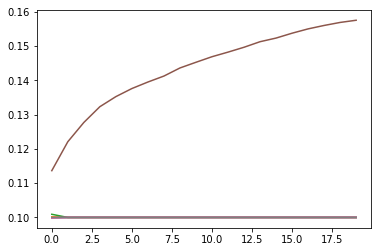

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
7s - loss: 14.5072 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/20
8s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/20
7s - loss: 14.5063 - acc: 0.1000 -

8s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/20
8s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/20
8s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
12s - loss: 14.0522 - acc: 0.1161 - val_loss: 13.8556 - val_acc: 0.1297
Epoch 2/20
12s - loss: 13.6989 - acc: 0.1390 - val_loss: 13.6262 - val_acc: 0.1428
Epoch 3/20
12s - loss: 13.5382 - acc: 0.1482 - val_loss: 13.5270 - val_acc: 0.1477
Epoch 4/20
12s - loss: 13.4307 - acc: 0.1541 - val_loss: 13.4198 - val_acc: 0.1537
Epoch 5/20
12s - loss: 13.3166 - acc: 0.1601 - val_loss: 13.2697 - val_acc: 0.1615
Epoch 6/20
12s - loss: 13.1513 - acc: 0.1689 - val_loss: 13.1151 - val_acc: 0.1706
Epoch 7/20
12s - loss: 13.0134 - acc: 0.1759 - val_loss: 13.0458 - val_acc: 0.1732
Epoch 8/20
12s - loss: 12.9513 - acc: 0.1793 - val_loss: 13.0048 - val_acc: 0.1771
Epoch 9/20
12s - loss: 12.9031 - acc: 0.1828 - va

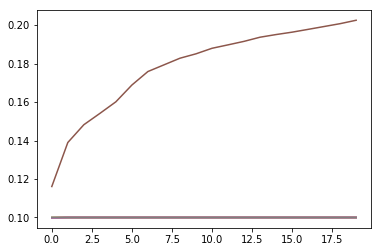

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
7s - loss: 14.5012 - acc: 0.1003 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/20
7s - loss: 14.5063 - acc: 0.1000 -

9s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/20
9s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/20
9s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
13s - loss: 13.4044 - acc: 0.1538 - val_loss: 12.8791 - val_acc: 0.1749
Epoch 2/20
12s - loss: 12.5126 - acc: 0.2010 - val_loss: 12.2712 - val_acc: 0.2152
Epoch 3/20
12s - loss: 12.1948 - acc: 0.2206 - val_loss: 12.1370 - val_acc: 0.2232
Epoch 4/20
12s - loss: 12.0272 - acc: 0.2310 - val_loss: 12.0355 - val_acc: 0.2291
Epoch 5/20
13s - loss: 11.9196 - acc: 0.2380 - val_loss: 11.9799 - val_acc: 0.2330
Epoch 6/20
13s - loss: 11.8334 - acc: 0.2439 - val_loss: 11.8198 - val_acc: 0.2436
Epoch 7/20
13s - loss: 11.7423 - acc: 0.2489 - val_loss: 11.7547 - val_acc: 0.2494
Epoch 8/20
13s - loss: 11.6752 - acc: 0.2523 - val_loss: 11.7055 - val_acc: 0.2499
Epoch 9/20
13s - loss: 11.5921 - acc: 0.2568 - va

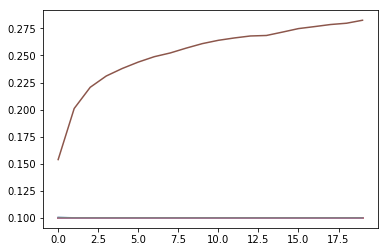

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
7s - loss: 14.5067 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/20
7s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/20
7s - loss: 14.5063 - acc: 0.1000 -

8s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/20
8s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/20
8s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
11s - loss: 13.7630 - acc: 0.1446 - val_loss: 13.6447 - val_acc: 0.1520
Epoch 2/20
11s - loss: 13.5143 - acc: 0.1601 - val_loss: 13.6408 - val_acc: 0.1518
Epoch 3/20
11s - loss: 13.4294 - acc: 0.1645 - val_loss: 13.0583 - val_acc: 0.1857
Epoch 4/20
11s - loss: 13.1686 - acc: 0.1796 - val_loss: 13.4495 - val_acc: 0.1628
Epoch 5/20
11s - loss: 13.0077 - acc: 0.1899 - val_loss: 12.9946 - val_acc: 0.1919
Epoch 6/20
11s - loss: 13.0352 - acc: 0.1884 - val_loss: 13.1356 - val_acc: 0.1816
Epoch 7/20
11s - loss: 13.0141 - acc: 0.1900 - val_loss: 12.8586 - val_acc: 0.1995
Epoch 8/20
11s - loss: 12.9041 - acc: 0.1966 - val_loss: 13.3508 - val_acc: 0.1702
Epoch 9/20
11s - loss: 13.2559 - acc: 0.1750 - va

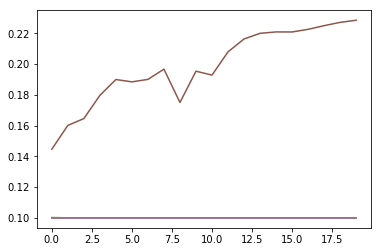

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
7s - loss: 14.5073 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/20
6s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/20
6s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/20
6s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/20
6s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/20
6s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/20
6s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/20
6s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/20
6s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/20
6s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/20
6s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/20
6s - loss: 14.5063 - acc: 0.1000 -

8s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/20
8s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/20
8s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
11s - loss: 14.5065 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/20
11s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/20
11s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/20
11s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/20
11s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/20
11s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/20
11s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/20
11s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/20
10s - loss: 14.5063 - acc: 0.1000 - va

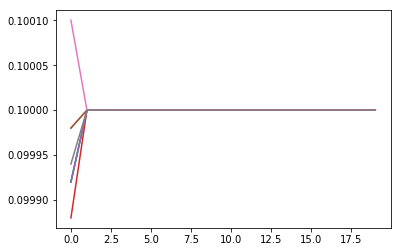

In [6]:
rates = [0.0001,0.001,.01,.1,1]

# Reshape y as one-hot
y_train = np_utils.to_categorical(tr_y, 10).astype(float)
y_test = np_utils.to_categorical(t_y, 10).astype(float)

# Flatten each image
input_dim = tr_x.shape[1]*tr_x.shape[2]*tr_x.shape[3]
x_train = tr_x.reshape((tr_x.shape[0], input_dim))
x_test = t_x.reshape((t_x.shape[0], input_dim))

# Permute the training data to be in random order
perm = np.random.permutation(x_train.shape[0])
x_train = x_train[perm]
y_train = y_train[perm]

for rate in rates :
    methods = generate_optimizers(rate)
    for meth in methods.keys() :
        method = methods[meth]
        model = build_keras_model(method)
        hist = model.fit(x_train,
                y_train,
                batch_size=128,
                epochs=20,
                verbose=2,
                shuffle=False,
                validation_data=(x_test, y_test))
        acc = hist.history['acc']
        plt.plot(acc, label=meth)
    plt.show()